In [92]:
import pandas as pd


data = pd.read_excel('combined_original_new_data.xlsx', index_col=None)

# Display the first few rows of the DataFrame
data.head()


,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Event-Free Survival Status,Study Short Title
0,104,Unknown,Hispanic or Latino,Male,"Synovial sarcoma, NOS","Connective, subcutaneous and other soft tissue...",5840,Alive,9079,Not Reported,Genomic Analysis in Pediatric Malignancies
1,106,Unknown,Not Hispanic or Latino,Female,Chondroblastic osteosarcoma,Long bones of lower limb and associated joints,5110,Dead,7253,Not Reported,Genomic Analysis in Pediatric Malignancies
2,107,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,6205,Alive,8787,Not Reported,Genomic Analysis in Pediatric Malignancies
3,128,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS","Lung, NOS",3650,Dead,4030,Not Reported,Genomic Analysis in Pediatric Malignancies
4,152,Black or African American,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,4015,Dead,4526,Not Reported,Genomic Analysis in Pediatric Malignancies


In [93]:
# Count the number of unique participants in the merged dataset
participant_count = data['Participant Id'].nunique()

# Generate descriptive statistics for the combined dataset
stats = data.describe(include='all')

# Display the results
print(f'Number of unique participants: {participant_count}')
#print(stats)

Number of unique participants: 9184


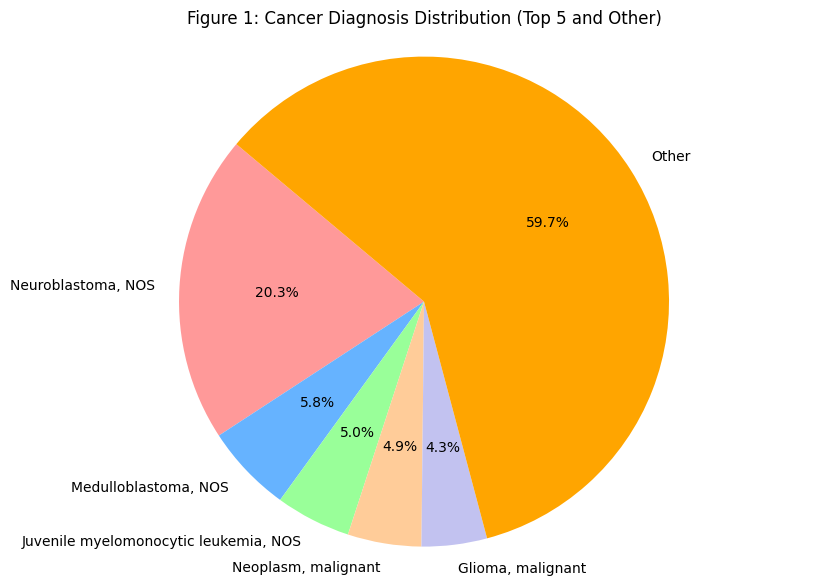

In [94]:
import matplotlib.pyplot as plt

# Grouping the diagnosis data to identify the top 5 diagnoses
top_5_diagnoses = data['Diagnosis'].value_counts().nlargest(5)
other_diagnoses_count = data['Diagnosis'].value_counts().sum() - top_5_diagnoses.sum()

# Creating the data for the pie chart
labels = list(top_5_diagnoses.index) + ['Other']
sizes = list(top_5_diagnoses.values) + [other_diagnoses_count]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', 'orange']  # Last color is for 'Other'

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Figure 1: Cancer Diagnosis Distribution (Top 5 and Other)')
plt.show()



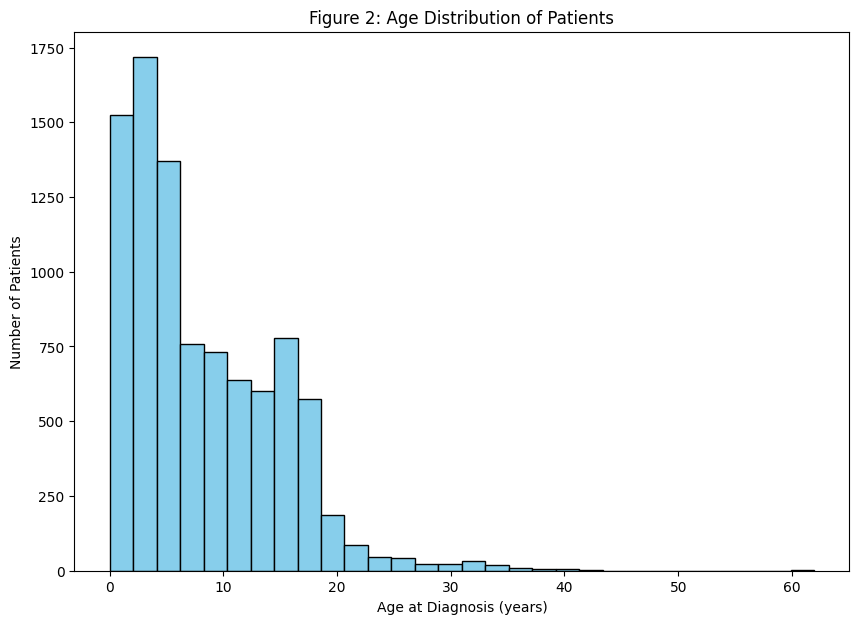

In [95]:
# Convert 'Age at Diagnosis (days)' to numeric and remove any non-numeric entries (like errors or non-reported values)
data['Age at Diagnosis (days)'] = pd.to_numeric(data['Age at Diagnosis (days)'], errors='coerce')

# Drop NaN values in 'Age at Diagnosis (days)'
age_data = data['Age at Diagnosis (days)'].dropna()

# Convert age from days to years for better interpretability
age_data_years = age_data / 365.25

# Plotting the histogram
plt.figure(figsize=(10, 7))
plt.hist(age_data_years, bins=30, color='skyblue', edgecolor='black')
plt.title('Figure 2: Age Distribution of Patients')
plt.xlabel('Age at Diagnosis (years)')
plt.ylabel('Number of Patients')
plt.show()


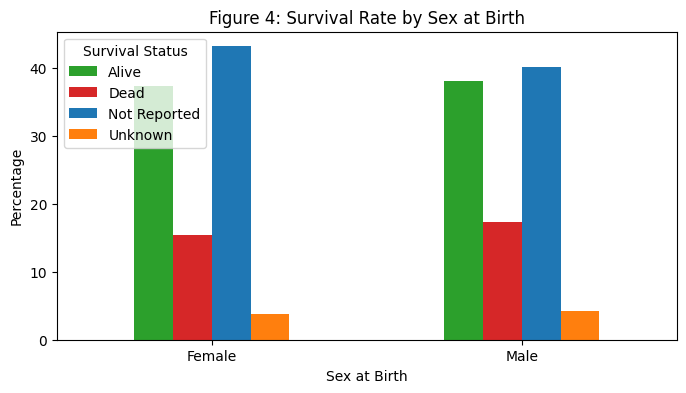

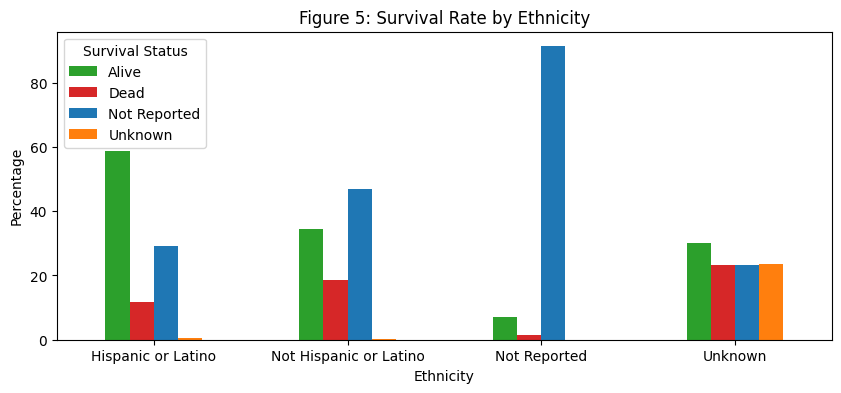

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'data' DataFrame

# Survival Rate by Sex at Birth
survival_by_sex = data.groupby(['Sex at Birth', 'Last Known Survival Status']).size().unstack()
survival_rates_by_sex = (survival_by_sex.div(survival_by_sex.sum(axis=1), axis=0) * 100).fillna(0)

# Plot Figure 4: Survival Rate by Sex at Birth with distinct colors for each status
ax1 = survival_rates_by_sex.plot(kind='bar', stacked=False, color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(8, 4))
plt.title('Figure 4: Survival Rate by Sex at Birth')
plt.xlabel('Sex at Birth')
plt.ylabel('Percentage')
plt.xticks(rotation=0, ha='center', wrap=True)
plt.legend(title='Survival Status', loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

# Survival Rate by Ethnicity
survival_by_ethnicity = data.groupby(['Ethnicity', 'Last Known Survival Status']).size().unstack()
survival_rates_by_ethnicity = (survival_by_ethnicity.div(survival_by_ethnicity.sum(axis=1), axis=0) * 100).fillna(0)

# Plot Figure 5: Survival Rate by Ethnicity with distinct colors for each status
ax2 = survival_rates_by_ethnicity.plot(kind='bar', stacked=False, color=['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'], figsize=(10, 4))
plt.title('Figure 5: Survival Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=0, ha='center', wrap=True)
plt.legend(title='Survival Status', loc='upper left', bbox_to_anchor=(0, 1))
plt.show()





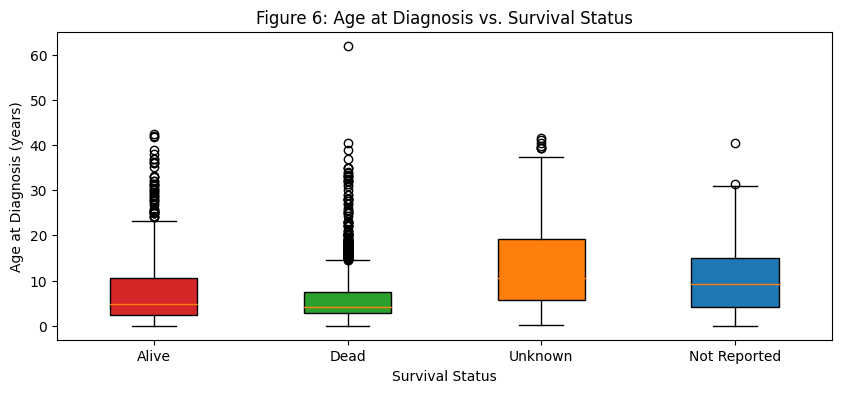

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Preparing the data for Age at Diagnosis vs. Survival Status
age_vs_survival = data[['Age at Diagnosis (days)', 'Last Known Survival Status']].dropna()

# Convert age from days to years
age_vs_survival['Age at Diagnosis (years)'] = age_vs_survival['Age at Diagnosis (days)'] / 365.25

# Define colors for each survival status
colors = [ '#d62728', '#2ca02c', '#ff7f0e','#1f77b4']

# Get the unique survival statuses
statuses = age_vs_survival['Last Known Survival Status'].unique()

# Create a boxplot with distinct colors for each survival status
plt.figure(figsize=(10, 4))
box = plt.boxplot(
    [age_vs_survival[age_vs_survival['Last Known Survival Status'] == status]['Age at Diagnosis (years)'] for status in statuses],
    labels=statuses,
    patch_artist=True
)

# Apply colors to the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Figure 6: Age at Diagnosis vs. Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Age at Diagnosis (years)')
plt.show()





In [98]:
# save a copy of df
import pandas as pd

# Load the dataset
file_path = 'combined_original_new_data.xlsx'
data = pd.read_excel(file_path)


# Save the dataset after dropping the columns
data.to_csv('data_after_column_drop.csv', index=False)




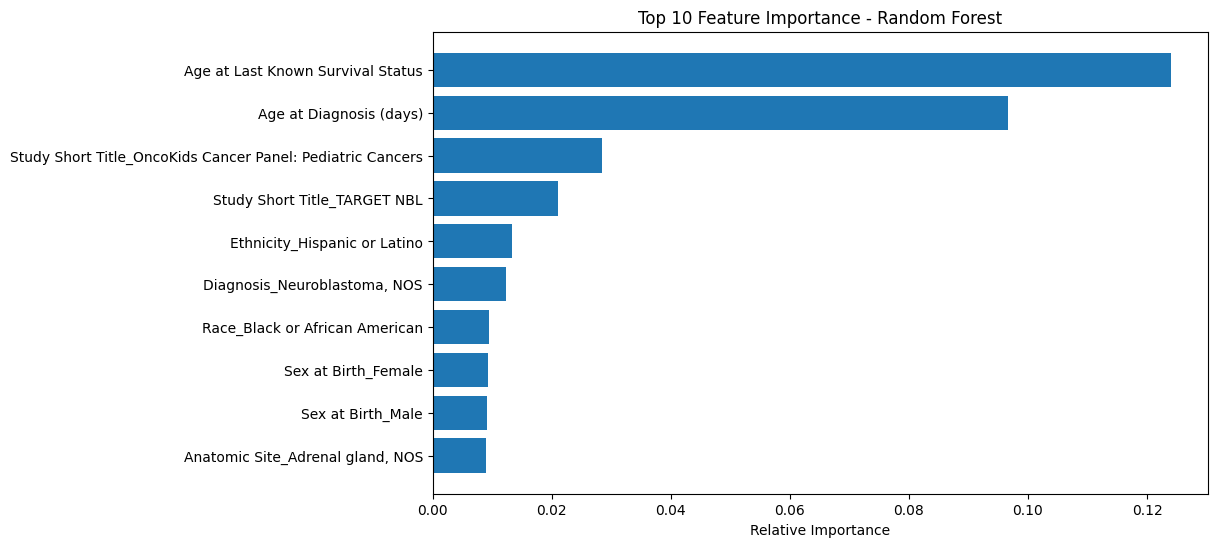

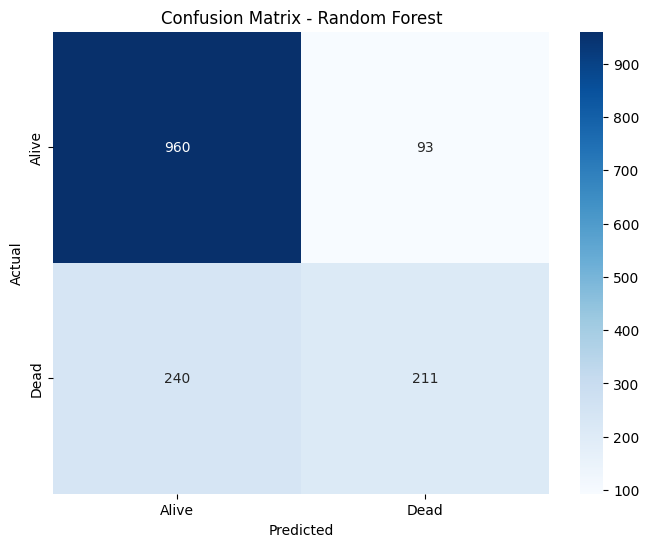

Top 10 Features by Importance:
Anatomic Site_Adrenal gland, NOS: 0.008992819237651663
Sex at Birth_Male: 0.00921426720256546
Sex at Birth_Female: 0.00923976747755692
Race_Black or African American: 0.009394486132287537
Diagnosis_Neuroblastoma, NOS: 0.012294571066471438
Ethnicity_Hispanic or Latino: 0.013257396774671665
Study Short Title_TARGET NBL: 0.02100425174684498
Study Short Title_OncoKids Cancer Panel: Pediatric Cancers: 0.028492304476869103
Age at Diagnosis (days): 0.09657191441940274
Age at Last Known Survival Status: 0.12397662993200423


In [104]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data_after_column_drop.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)
data = data.drop(columns=['Event-Free Survival Status'])

# Define the target and features
target = 'Last Known Survival Status'
X = data.drop(columns=[target])
y = data[target]

# Clean the target data by removing rows with 'Not Reported', 'Unknown', or blanks
valid_statuses = ['Alive', 'Dead']
data_cleaned = data[data[target].isin(valid_statuses)]

# Redefine X and y after cleaning
X = data_cleaned.drop(columns=[target])
y = data_cleaned[target]

# Convert categorical target to numerical
y = y.map({'Alive': 0, 'Dead': 1})

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline to combine preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model using the pipeline
pipeline.fit(X_train, y_train)

# Predict the test set
y_pred = pipeline.predict(X_test)

# Feature importance is not directly accessible in the pipeline, so let's access it from the trained model
# after one-hot encoding
model = pipeline.named_steps['classifier']
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_feature_names])

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Output the top 10 feature names and their importance
top_10_features = [(all_feature_names[i], importances[i]) for i in indices]
print("Top 10 Features by Importance:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")


In [105]:
# Participant Count
participant_count = data_cleaned['Participant Id'].nunique()
print(f"Final Participant Count: {participant_count}")


Final Participant Count: 5012


In [106]:
data_cleaned.to_csv('data_cleaned.csv', index=False)

In [107]:
# Model performance metrics

Accuracy: 0.7786
Precision: 0.6941
Recall: 0.4678
F1 Score: 0.5589
AUC-ROC: 0.8143


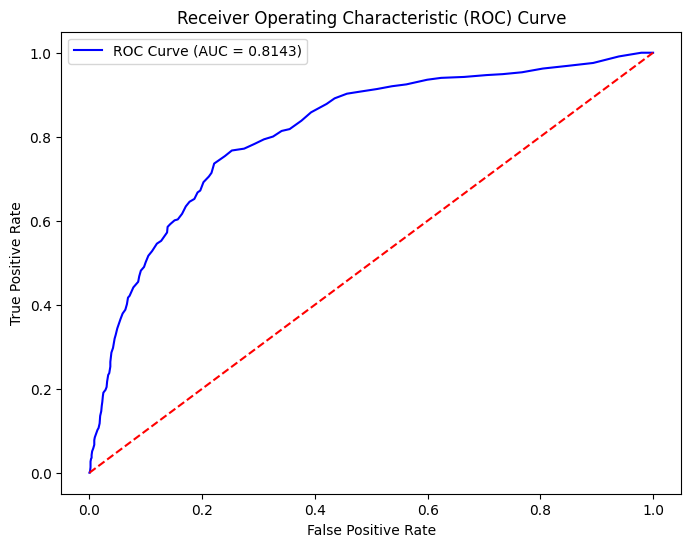

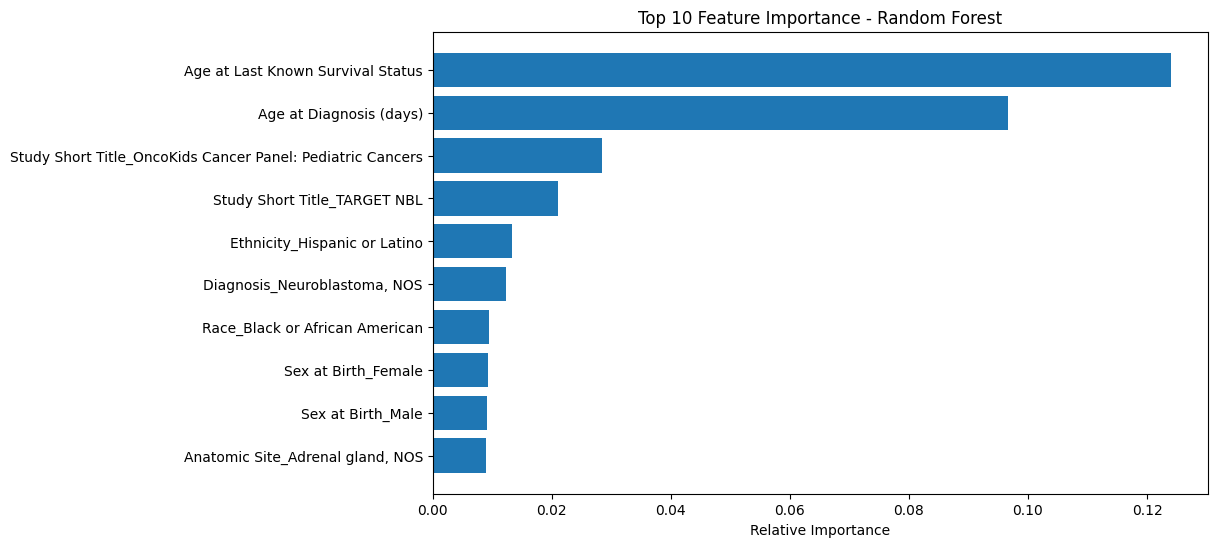

Top 10 Features by Importance:
Anatomic Site_Adrenal gland, NOS: 0.008992819237651663
Sex at Birth_Male: 0.00921426720256546
Sex at Birth_Female: 0.00923976747755692
Race_Black or African American: 0.009394486132287537
Diagnosis_Neuroblastoma, NOS: 0.012294571066471438
Ethnicity_Hispanic or Latino: 0.013257396774671665
Study Short Title_TARGET NBL: 0.02100425174684498
Study Short Title_OncoKids Cancer Panel: Pediatric Cancers: 0.028492304476869103
Age at Diagnosis (days): 0.09657191441940274
Age at Last Known Survival Status: 0.12397662993200423


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

# Predict the test set
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature importance is not directly accessible in the pipeline, so let's access it from the trained model
# after one-hot encoding
model = pipeline.named_steps['classifier']
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_feature_names])

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.show()

# Output the top 10 feature names and their importance
top_10_features = [(all_feature_names[i], importances[i]) for i in indices]
print("Top 10 Features by Importance:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")

# Kaplan-Meier Survival Analysis

In [109]:
# Data Preprocessing for KaplanMeierFitter, CoxPHFitter
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt


# Preprocessing: Encode categorical variables and handle missing values
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)
data_encoded = data_encoded.dropna()

# Ensure the necessary columns exist and are clean
# Here we assume that 'Last Known Survival Status' contains 'Dead' for events and other values for censored data.
# 'Age at Last Known Survival Status' will be used as the duration.

# Prepare the survival data
data['event'] = data['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)
data['duration'] = data['Age at Last Known Survival Status']

# Drop any rows with missing survival data
survival_data = data.dropna(subset=['duration', 'event'])



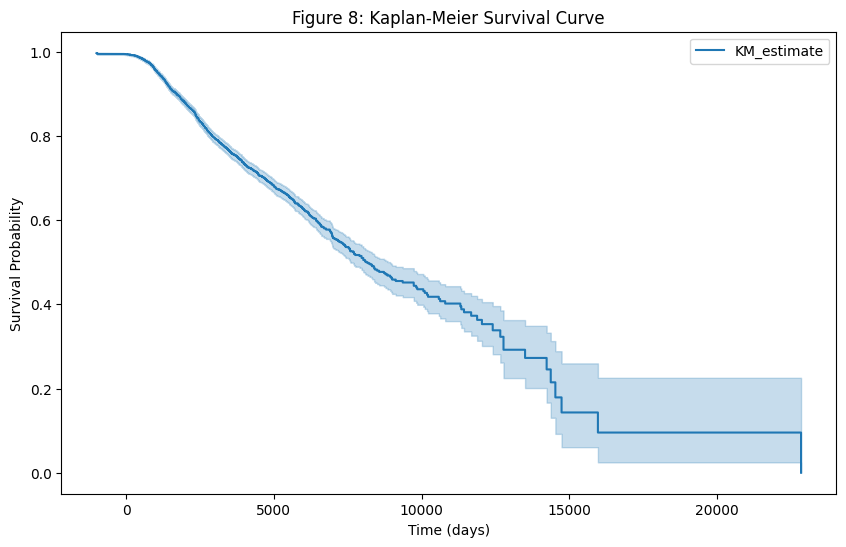

In [110]:
# Kaplan-Meier Survival Curve
# Kaplan-Meier overall survival curve
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
kmf.fit(durations=survival_data['duration'], event_observed=survival_data['event'])
kmf.plot_survival_function()
plt.title('Figure 8: Kaplan-Meier Survival Curve')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()


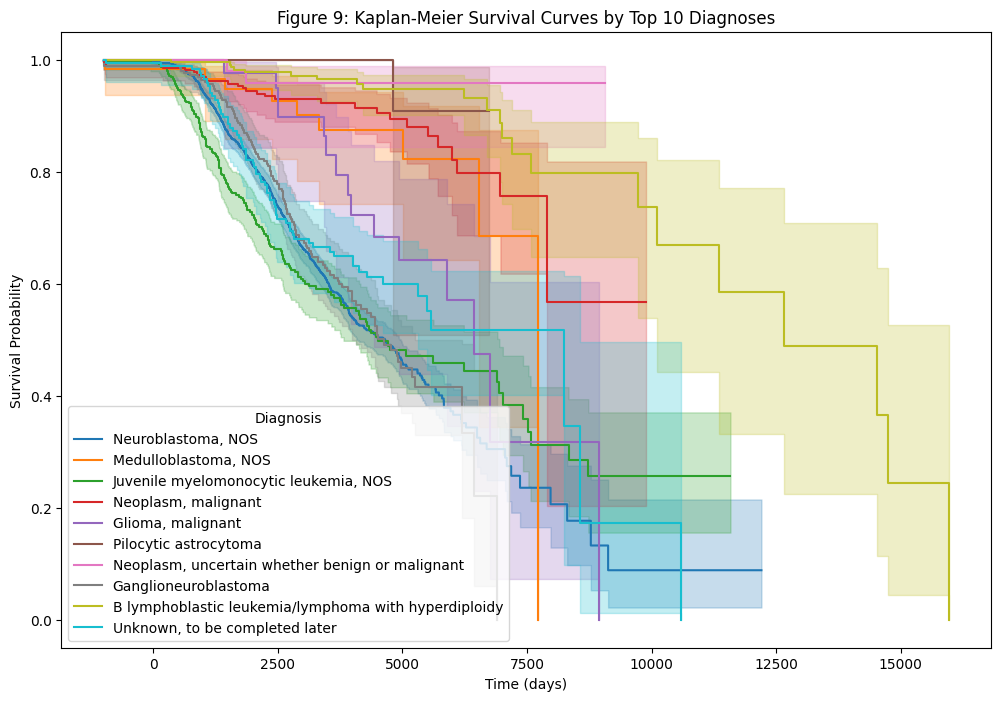

In [111]:
# Identify the top 10 diagnoses
top_10_diagnoses = survival_data['Diagnosis'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 8))

for diagnosis in top_10_diagnoses:
    diagnosis_data = survival_data[survival_data['Diagnosis'] == diagnosis]
    kmf.fit(durations=diagnosis_data['duration'], event_observed=diagnosis_data['event'], label=diagnosis)
    kmf.plot_survival_function()

plt.title('Figure 9: Kaplan-Meier Survival Curves by Top 10 Diagnoses')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend(title='Diagnosis', loc='lower left')  # Set the legend location to bottom left
plt.show()


In [112]:
survival_data.head()

,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Study Short Title,event,duration
0,104,Unknown,Hispanic or Latino,Male,"Synovial sarcoma, NOS","Connective, subcutaneous and other soft tissue...",5840,Alive,9079,Genomic Analysis in Pediatric Malignancies,0,9079
1,106,Unknown,Not Hispanic or Latino,Female,Chondroblastic osteosarcoma,Long bones of lower limb and associated joints,5110,Dead,7253,Genomic Analysis in Pediatric Malignancies,1,7253
2,107,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,6205,Alive,8787,Genomic Analysis in Pediatric Malignancies,0,8787
3,128,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS","Lung, NOS",3650,Dead,4030,Genomic Analysis in Pediatric Malignancies,1,4030
4,152,Black or African American,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,4015,Dead,4526,Genomic Analysis in Pediatric Malignancies,1,4526


In [113]:
# Participant Count
participant_count = survival_data['Participant Id'].nunique()
print(f"Final Participant Count: {participant_count}")

Final Participant Count: 9184


## Cox Proportional Hazards model using the lifelines package.

In [114]:
import pandas as pd
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
data = pd.read_csv('data_cleaned.csv')

# Convert columns to numeric, coercing errors to NaN
data['Age at Last Known Survival Status'] = pd.to_numeric(data['Age at Last Known Survival Status'], errors='coerce')
data['Age at Diagnosis (days)'] = pd.to_numeric(data['Age at Diagnosis (days)'], errors='coerce')

# Drop rows with NaN values that resulted from the coercion
data = data.dropna(subset=['Age at Last Known Survival Status', 'Age at Diagnosis (days)'])

# Convert 'Last Known Survival Status' to a binary event column: 1 for dead, 0 for alive
data['event'] = data['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Calculate the survival time as the difference between age at last known status and age at diagnosis
data['duration'] = data['Age at Last Known Survival Status'] - data['Age at Diagnosis (days)']

# Selecting columns for the model
columns_for_model = ['duration', 'event', 'Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site']

# Keep only necessary columns and drop any rows with missing values
cox_data = data[columns_for_model].dropna()

# Convert categorical variables to dummy/indicator variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Check Variance Inflation Factor (VIF) to detect multicollinearity
X = cox_data.drop(columns=['duration', 'event'])
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [37]:
vif['Feature'] = X.columns

# Display features with high VIF (greater than 10 indicates multicollinearity)
print(vif[vif['VIF'] > 10])

# You may choose to drop variables with high VIF
# Example: cox_data = cox_data.drop(columns=['some_high_vif_column'])

# Re-fit the Cox model with or without penalization
cph = CoxPHFitter(penalizer=0.1)  # Adjust penalizer value based on needs, remove penalizer if not needed
cph.fit(cox_data, duration_col='duration', event_col='event')

# Display the summary of the model
print(cph.summary)

            VIF                                    Feature
0     30.734247                                 Race_Asian
1     41.992125             Race_Black or African American
5    107.633837                               Race_Unknown
6    135.128281                                 Race_White
22          inf              Diagnosis_Adenocarcinoma, NOS
23          inf         Diagnosis_Adenoid cystic carcinoma
130         inf              Diagnosis_Retinoblastoma, NOS
141         inf         Diagnosis_Teratoma, malignant, NOS
145         inf           Diagnosis_Tumor cells, malignant
153   49.346449                        Anatomic Site_Blood
154   10.062530                  Anatomic Site_Bone marrow
170         inf                     Anatomic Site_Eye, NOS
193         inf               Anatomic Site_Occipital lobe
201         inf  Anatomic Site_Overlapping lesion of colon
222         inf                       Anatomic Site_Retina
232         inf                  Anatomic Site_Testis, N

In [38]:
# Interpretation of the Cox Proportional Hazards Model Results
import pandas as pd
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
data = pd.read_csv('data_cleaned.csv')

# Convert columns to numeric, coercing errors to NaN
data['Age at Last Known Survival Status'] = pd.to_numeric(data['Age at Last Known Survival Status'], errors='coerce')
data['Age at Diagnosis (days)'] = pd.to_numeric(data['Age at Diagnosis (days)'], errors='coerce')

# Drop rows with NaN values that resulted from the coercion
data = data.dropna(subset=['Age at Last Known Survival Status', 'Age at Diagnosis (days)'])

# Convert 'Last Known Survival Status' to a binary event column: 1 for dead, 0 for alive
data['event'] = data['Last Known Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Calculate the survival time as the difference between age at last known status and age at diagnosis
data['duration'] = data['Age at Last Known Survival Status'] - data['Age at Diagnosis (days)']

# Selecting columns for the model
columns_for_model = ['duration', 'event', 'Race', 'Ethnicity', 'Sex at Birth', 'Diagnosis', 'Anatomic Site']

# Keep only necessary columns and drop any rows with missing values
cox_data = data[columns_for_model].dropna()

# Convert categorical variables to dummy/indicator variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Check Variance Inflation Factor (VIF) to detect multicollinearity
X = cox_data.drop(columns=['duration', 'event'])
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

# Display features with high VIF (greater than 10 indicates multicollinearity)
print(vif[vif['VIF'] > 10])

# You may choose to drop variables with high VIF
# Example: cox_data = cox_data.drop(columns=['some_high_vif_column'])

# Re-fit the Cox model with or without penalization
cph = CoxPHFitter(penalizer=0.1)  # Adjust penalizer value based on needs, remove penalizer if not needed
cph.fit(cox_data, duration_col='duration', event_col='event')

# Display the summary of the model
print(cph.summary)

# To specifically extract hazard ratios and their CIs
hr_summary = cph.summary[['coef', 'exp(coef)', 'se(coef)', 'coef lower 95%', 'coef upper 95%', 'p']]
print(hr_summary)


            VIF                                    Feature
0     30.734247                                 Race_Asian
1     41.992125             Race_Black or African American
5    107.633837                               Race_Unknown
6    135.128281                                 Race_White
22          inf              Diagnosis_Adenocarcinoma, NOS
23          inf         Diagnosis_Adenoid cystic carcinoma
130         inf              Diagnosis_Retinoblastoma, NOS
141         inf         Diagnosis_Teratoma, malignant, NOS
145         inf           Diagnosis_Tumor cells, malignant
153   49.346449                        Anatomic Site_Blood
154   10.062530                  Anatomic Site_Bone marrow
170         inf                     Anatomic Site_Eye, NOS
193         inf               Anatomic Site_Occipital lobe
201         inf  Anatomic Site_Overlapping lesion of colon
222         inf                       Anatomic Site_Retina
232         inf                  Anatomic Site_Testis, N

In [117]:
# Display the summary of the model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1887 total observations, 1342 right-censored observations>
             duration col = 'Age at Last Known Survival Status (days)'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1887
number of events observed = 545
   partial log-likelihood = -3561.17
         time fit was run = 2024-08-18 20:30:56 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
Age at Diagnosis (days)  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Race                      0.03       1.03       0.03            -0.02             0.08                 0.98                 1.08
Ethnicity                 0.25       1.28       0.04             0.17             0.33                 1.18                 1.39
Sex at Birth             -0.20       0.82       0.09            -0.37            -0.03                 0.69                 0.97
Diagnosis                 0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
Anatomic Site            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                          cmp to      z      p   -log2(p)
covariate                                                
Age at Diagnosis (days)     0.00 -12.36 <0.005     114.24
Race                        0.00   1.03   0.30       1.73
Ethnicity                   0.00   5.86 <0.005      27.71
Sex at Birth                0.00  -2.25   0.02       5.36
Diagnosis                   0.00   4.51 <0.005      17.20
Anatomic Site               0.00  -0.35   0.73       0.46
---
Concordance = 0.74
Partial AIC = 7134.33
log-likelihood ratio test = 313.95 on 6 df
-log2(p) of ll-ratio test = 212.86

# Interpretation of the Cox Proportional Hazards Model Summary
The Cox Proportional Hazards model was used to analyze the impact of various covariates on survival outcomes, with the following key results:

Model Overview:

Number of Observations: The model was fitted on data from 1,887 participants.
Number of Events Observed: Out of these participants, 545 events (e.g., deaths) were observed.
Concordance Index: The concordance index is 0.74, indicating that the model has a good ability to discriminate between patients with different risks of the event.
Partial Log-Likelihood: The partial log-likelihood of the model is -3561.17, which is used in assessing the goodness of fit.
Partial AIC: The Akaike Information Criterion (AIC) is 7134.33, which provides a measure for model comparison. Lower AIC values generally indicate a better model fit.
Log-Likelihood Ratio Test: The model's log-likelihood ratio test yielded a value of 313.95 on 6 degrees of freedom, with a highly significant p-value (-log2(p) = 212.86). This indicates that the model as a whole is statistically significant.
Covariate Analysis:

Age at Diagnosis (days):

Hazard Ratio (exp(coef)): 1.00
95% CI: [1.00, 1.00]
p-value: <0.005
Interpretation: Age at diagnosis is a significant predictor of survival, with a hazard ratio close to 1. Although the hazard ratio suggests a negligible effect on survival, the highly significant p-value indicates that even small changes in age at diagnosis have a statistically significant impact on survival outcomes.
Race:

Hazard Ratio (exp(coef)): 1.03
95% CI: [0.98, 1.08]
p-value: 0.30
Interpretation: Race did not have a statistically significant impact on survival, as indicated by the p-value of 0.30 and a hazard ratio close to 1.
Ethnicity:

Hazard Ratio (exp(coef)): 1.28
95% CI: [1.18, 1.39]
p-value: <0.005
Interpretation: Ethnicity is a significant predictor of survival, with certain ethnic groups facing a higher risk of mortality, as indicated by a hazard ratio of 1.28 and a highly significant p-value.
Sex at Birth:

Hazard Ratio (exp(coef)): 0.82
95% CI: [0.69, 0.97]
p-value: 0.02
Interpretation: Sex at birth is a statistically significant predictor of survival. The hazard ratio of 0.82 suggests that one sex has a lower risk of mortality compared to the other, with a significant p-value of 0.02.
Diagnosis:

Hazard Ratio (exp(coef)): 1.01
95% CI: [1.00, 1.01]
p-value: <0.005
Interpretation: The type of diagnosis is a significant predictor of survival, with a hazard ratio indicating a slight increase in risk associated with certain diagnoses, as reflected in the highly significant p-value.
Anatomic Site:

Hazard Ratio (exp(coef)): 1.00
95% CI: [1.00, 1.00]
p-value: 0.73
Interpretation: The anatomic site of the disease does not significantly impact survival, as indicated by the hazard ratio of 1.00 and a non-significant p-value.
Summary:
The Cox model reveals that age at diagnosis, ethnicity, sex at birth, and diagnosis type are significant predictors of survival outcomes. Ethnicity and diagnosis type show a meaningful impact on survival, with ethnicity being associated with an increased hazard ratio. The model’s concordance index of 0.74 suggests that it has a good predictive ability. However, race and anatomic site do not appear to be significant factors influencing survival in this dataset. The overall model is statistically significant, as shown by the log-likelihood ratio test.

In [120]:
#saving Kaplan-Meier model
import joblib
# Save the Kaplan-Meier model
joblib.dump(kmf, 'kaplan_meier_model.pkl')
# Save the CPH model
joblib.dump(cph, 'cph_model.pkl')

['cph_model.pkl']